In [43]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from salishsea_tools import (nc_tools, viz_tools, gsw_calls)
import numpy.ma as ma
import glob
import xarray as xr
import pandas as pd
import scipy.signal as signal
import datetime
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
%matplotlib inline

In [4]:
grid = xr.open_dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')
mesh_mask = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/mesh_mask201702.nc')
winds_data = xr.open_dataset(
    'https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSaSurfaceAtmosphereFieldsV1')
N = 1
Wn = 1/24
B, A = signal.butter(N,Wn)

In [32]:
years = np.array([])
start_days = np.array([])
start_months = np.array([])
end_days = np.array([])
end_months = np.array([])
for line in open("/home/vdo/Downloads/carb_data.txt"):
    li=line.strip()
    if not li.startswith("#"):
        years = np.append(years, line.rstrip().split()[0])
        start_days = np.append(start_days, line.rstrip().split()[1])
        start_months = np.append(start_months, line.rstrip().split()[2])
        end_days = np.append(end_days, line.rstrip().split()[3])
        end_months = np.append(end_months, line.rstrip().split()[4])

In [41]:
def plot_winds(first, lastday):
    fig, ax = plt.subplots(figsize = (30, 5))
    end_index = (lastday - first).days * 24 + 24
    times = np.array([first + datetime.timedelta(hours = i) for i in range(end_index)])
    averaged_SI_u_winds = np.array([])
    averaged_SI_v_winds = np.array([])
    averaged_SS_u_winds = np.array([])
    averaged_SS_v_winds = np.array([])
    for n in range(end_index):
        SI_u_winds = winds_data.u_wind.isel(gridY=slice(159,162), 
                                            gridX=slice(119,122)).sel(time=times[n], 
                                                                      method = 'nearest').values
        averaged_SI_u_winds = np.append(averaged_SI_u_winds, np.mean(SI_u_winds))
        SI_v_winds = winds_data.v_wind.isel(gridY=slice(159,162), 
                                            gridX=slice(119,122)).sel(time=times[n], 
                                                                      method = 'nearest').values
        averaged_SI_v_winds = np.append(averaged_SI_v_winds, np.mean(SI_v_winds))
        SS_u_winds = winds_data.u_wind.isel(gridY=slice(182,185), 
                                            gridX=slice(106,109)).sel(time=times[n], 
                                                                      method = 'nearest').values
        averaged_SS_u_winds = np.append(averaged_SS_u_winds, np.mean(SS_u_winds))
        SS_v_winds = winds_data.v_wind.isel(gridY=slice(182,185), 
                                            gridX=slice(106,109)).sel(time=times[n], 
                                                                      method = 'nearest').values
        averaged_SS_v_winds = np.append(averaged_SS_v_winds, np.mean(SS_v_winds))
    rotated_SI_u_winds, rotated_SI_v_winds = viz_tools.rotate_vel(averaged_SI_u_winds, 
                                                                  averaged_SI_v_winds, 
                                                                  origin = 'map' )
    rotated_SS_u_winds, rotated_SS_v_winds = viz_tools.rotate_vel(averaged_SS_u_winds, 
                                                                  averaged_SS_v_winds, 
                                                                  origin = 'map' )
    SIwindfu = signal.filtfilt(B,A, rotated_SI_u_winds)
    SIwindfv = signal.filtfilt(B,A, rotated_SI_v_winds)
    SSwindfu = signal.filtfilt(B,A, rotated_SS_u_winds)
    SSwindfv = signal.filtfilt(B,A, rotated_SS_v_winds)
    ax.set_title('Averaged and Filtered Winds')
    ax.plot(times, SIwindfu, '--', color = 'teal', label = 'South U winds')
    ax.plot(times, SIwindfv, '-', color = 'teal', label = 'South V winds')
    ax.plot(times, SSwindfu, '--', color = 'tomato', label = 'North U winds')
    ax.plot(times, SSwindfv, '-', color = 'tomato', label = 'North V winds')
    ax.grid('on')
    ax.set_ylim(-10,15)
    ax.legend()

In [56]:
years.shape

(36,)

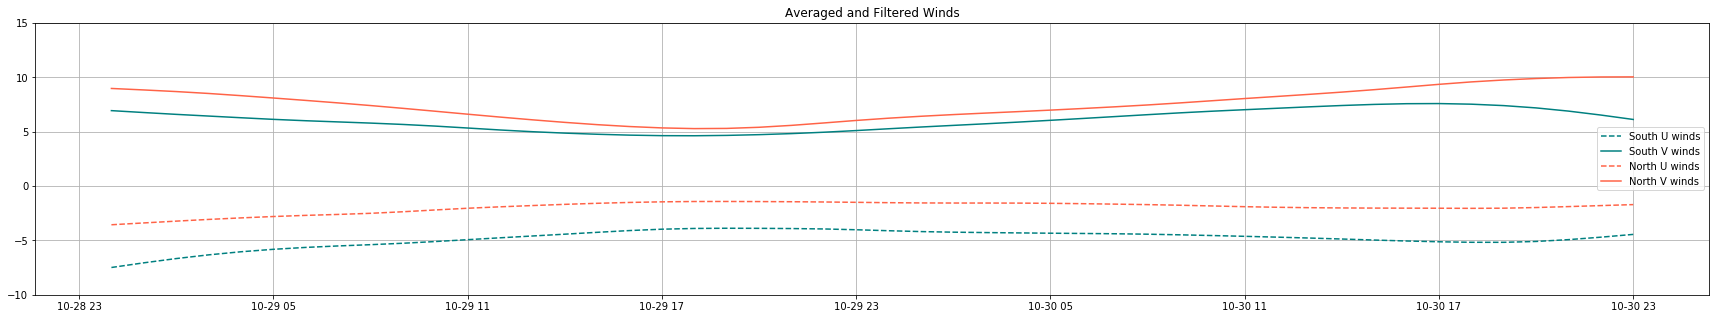

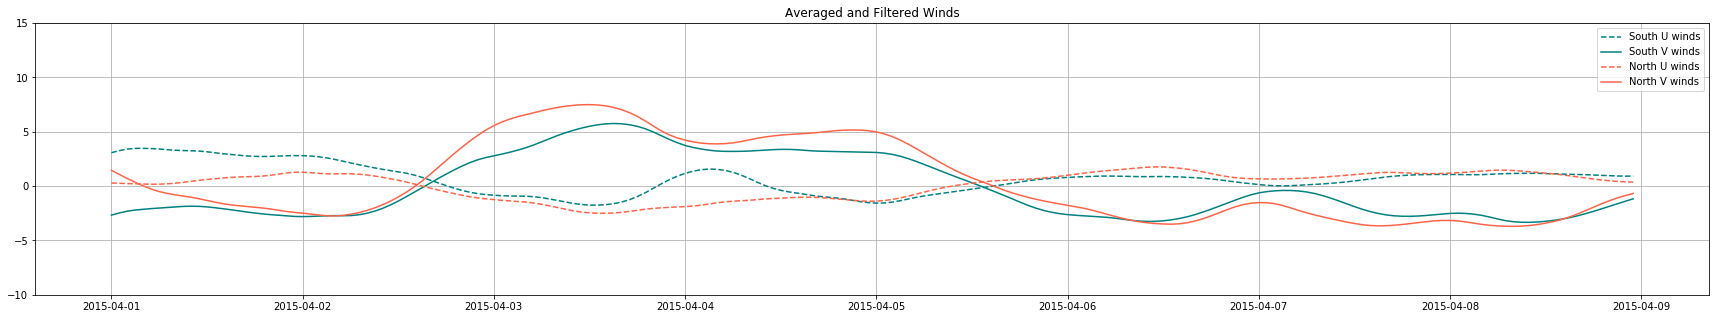

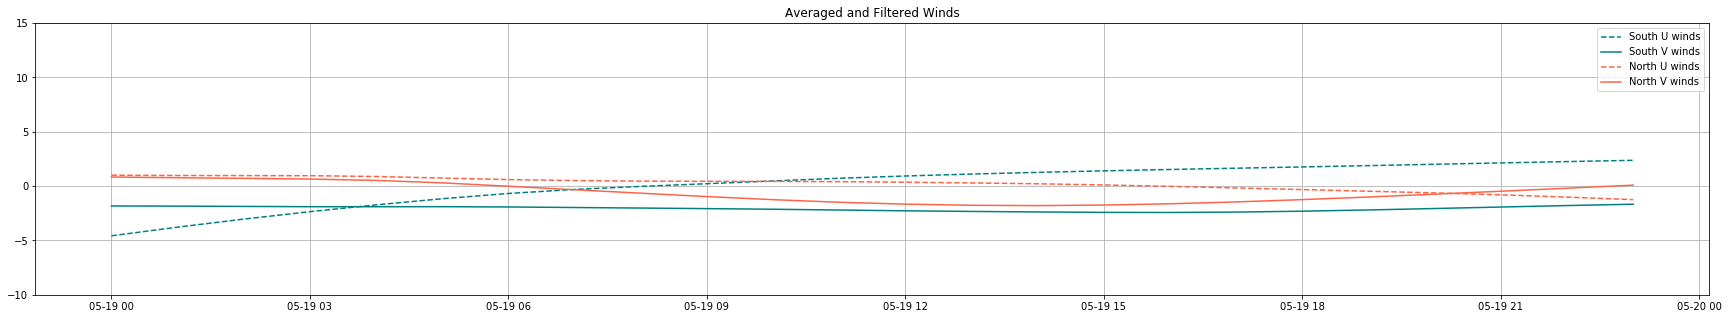

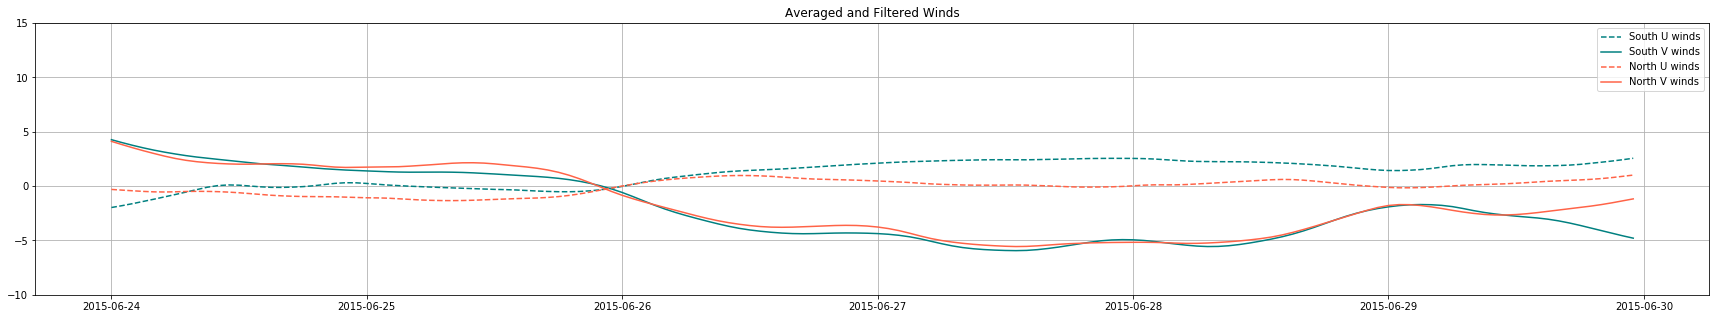

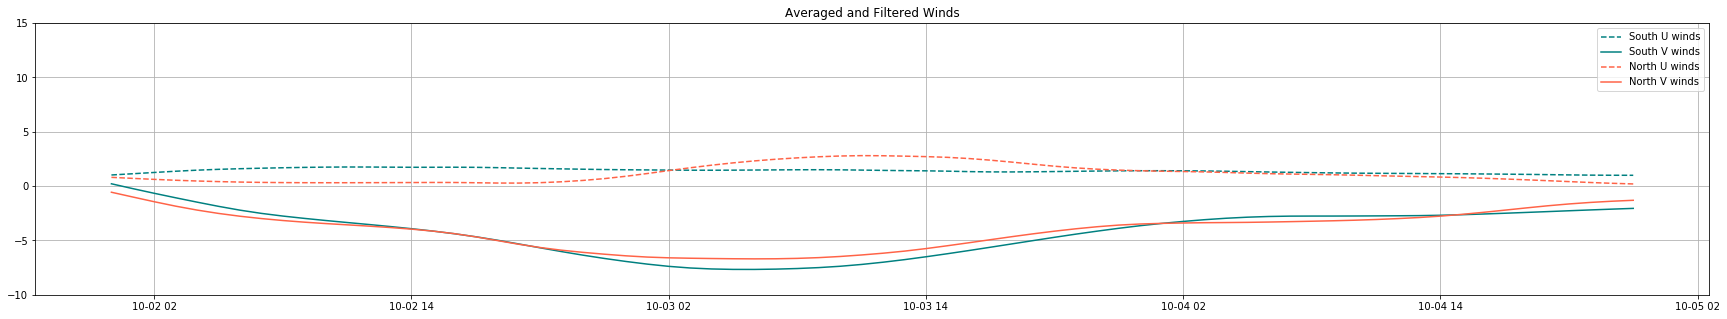

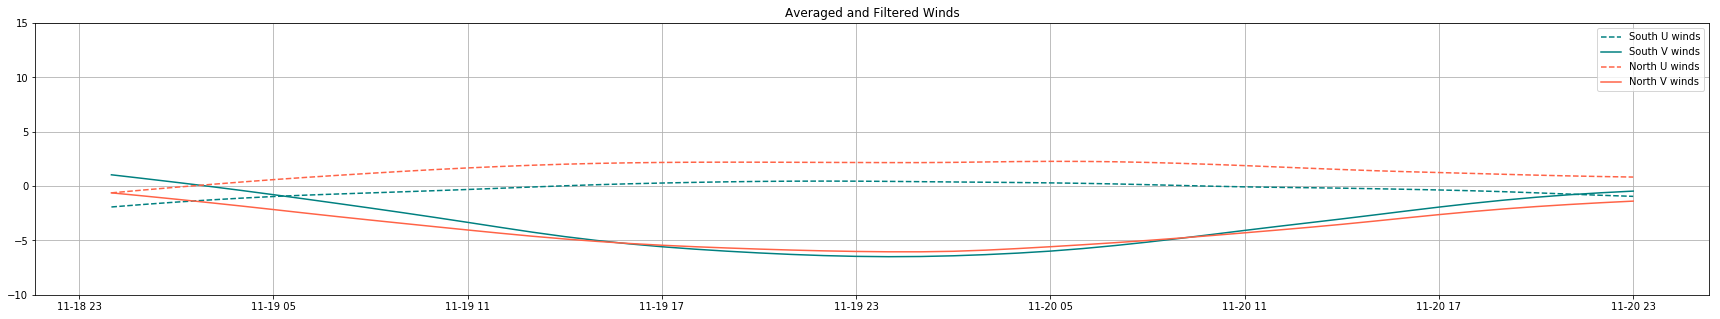

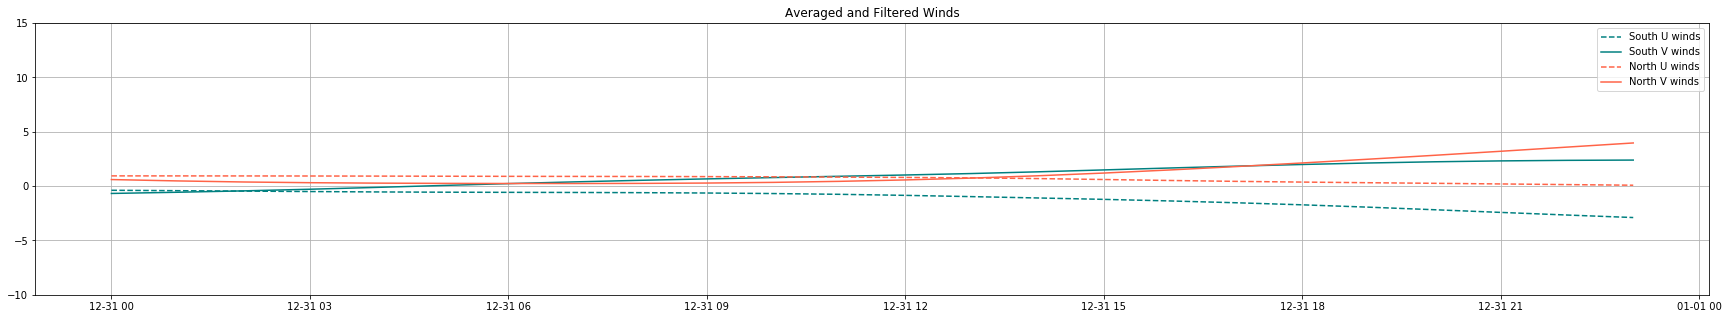

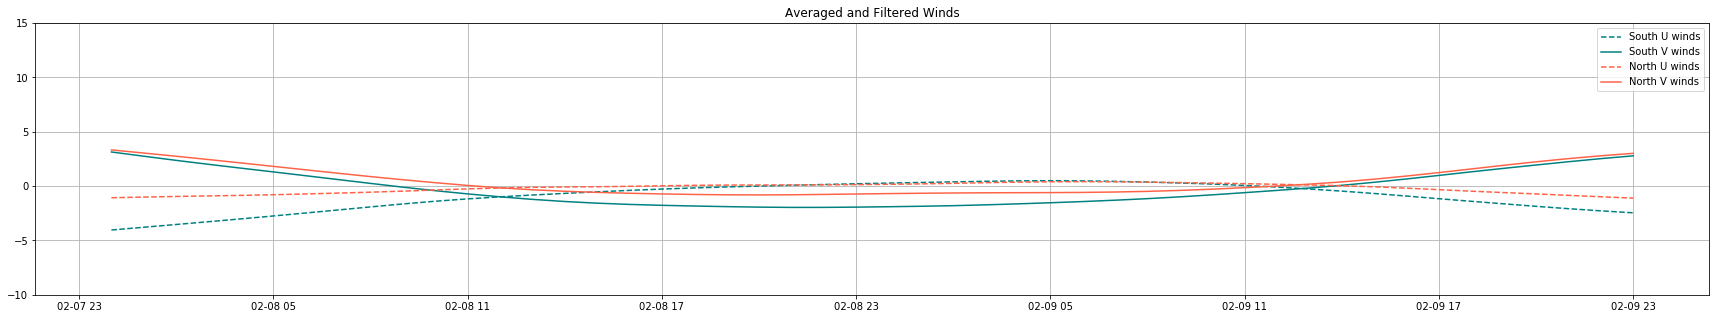

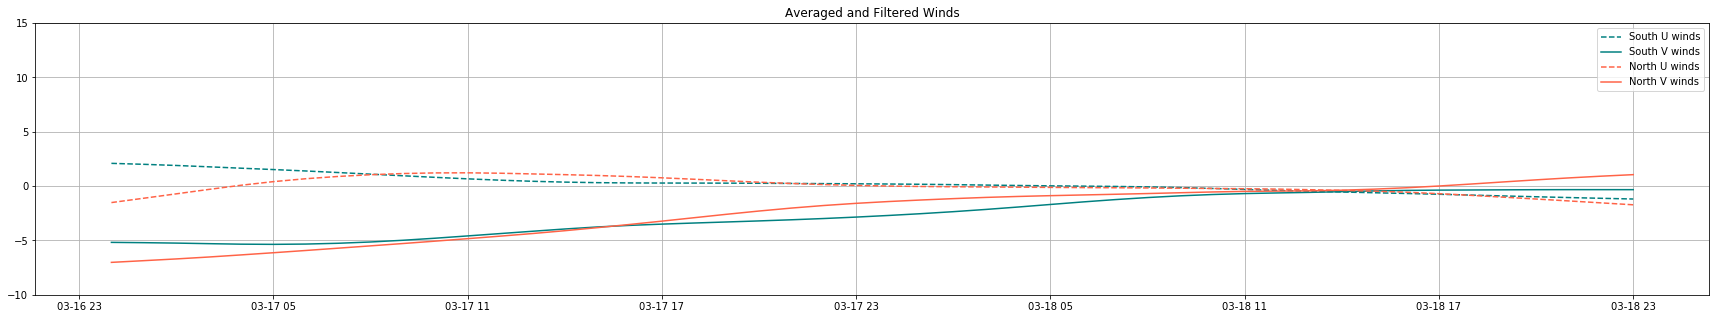

In [57]:
for n in range(2, 11):
    plot_winds(datetime.datetime(int(years[n]),int(start_months[n]),int(start_days[n])), 
               datetime.datetime(int(years[n]),int(end_months[n]),int(end_days[n])))

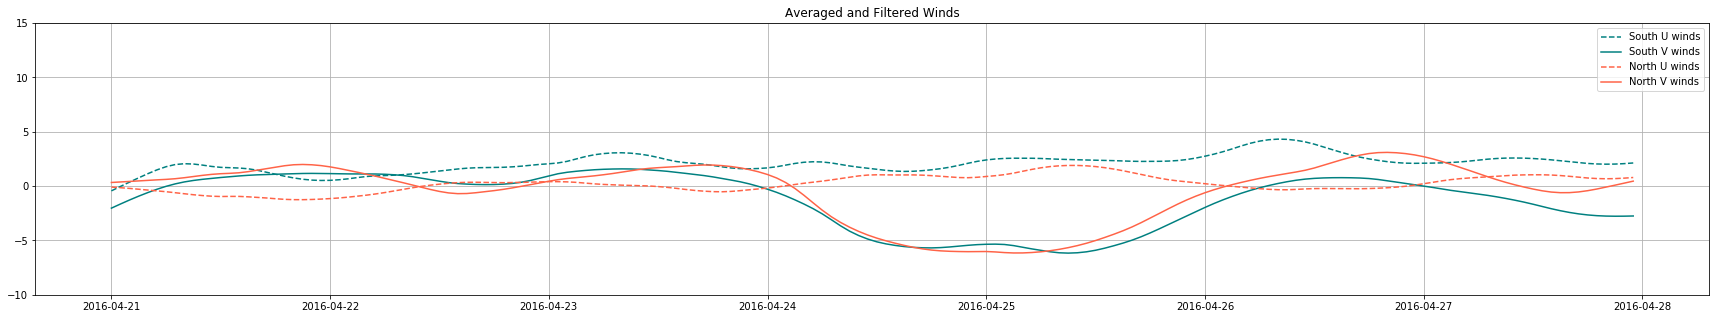

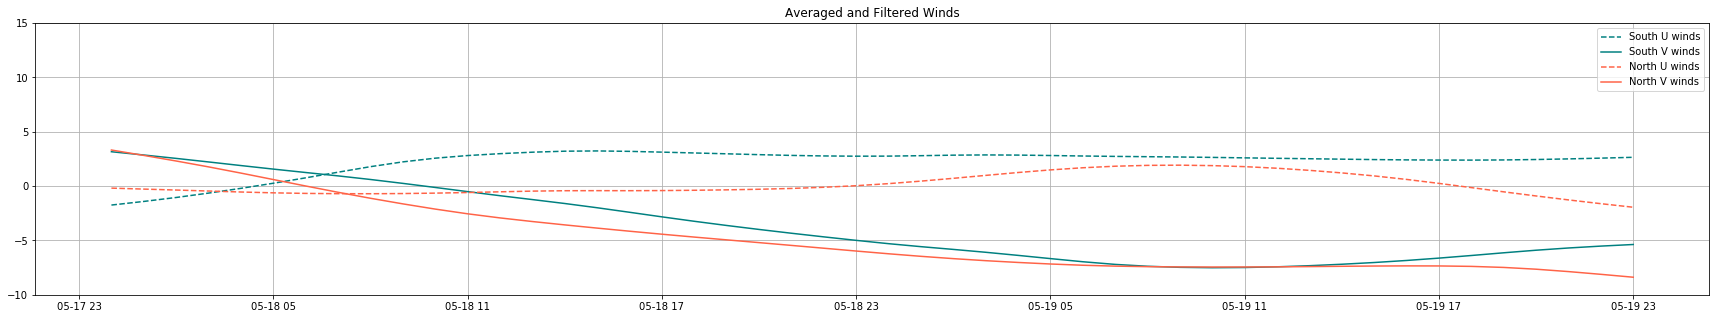

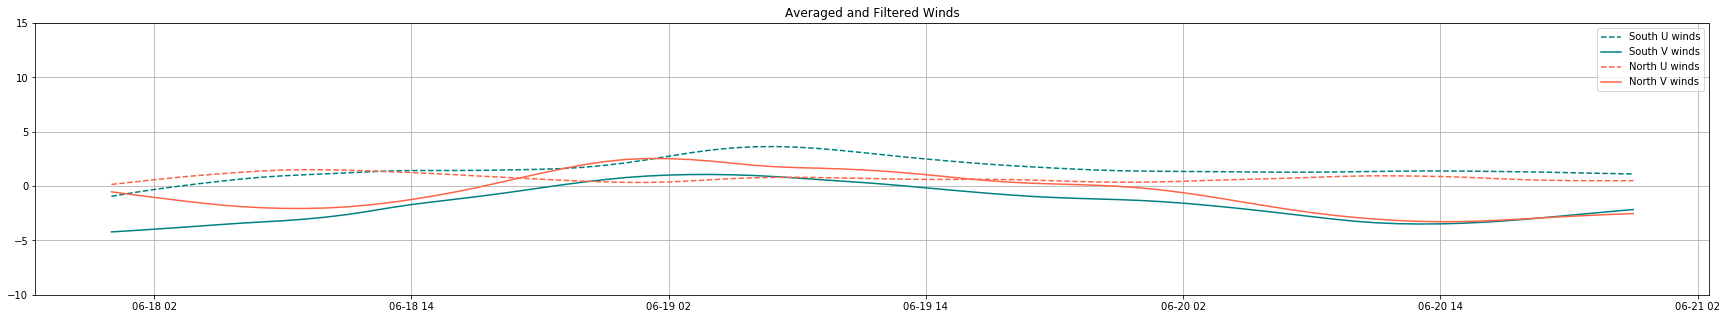

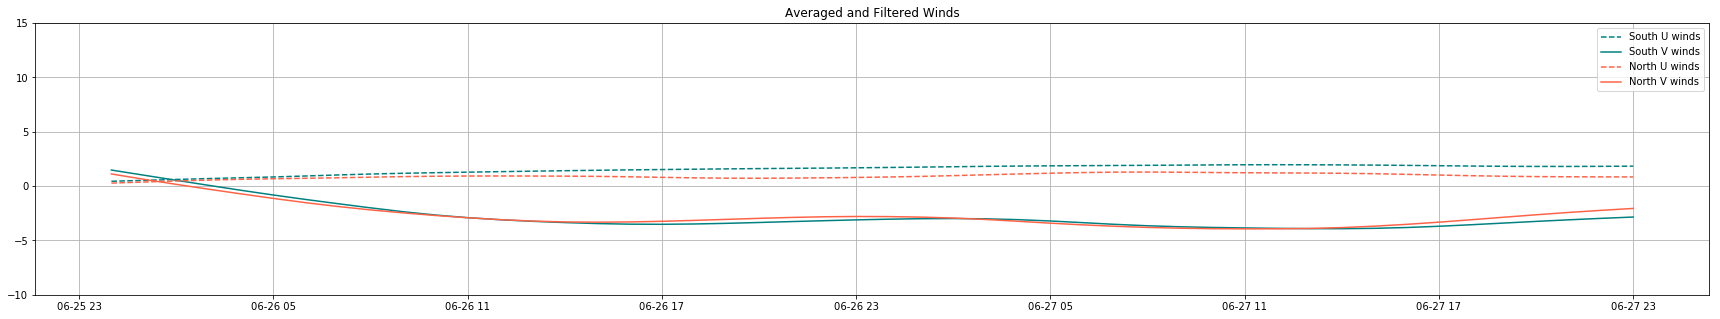

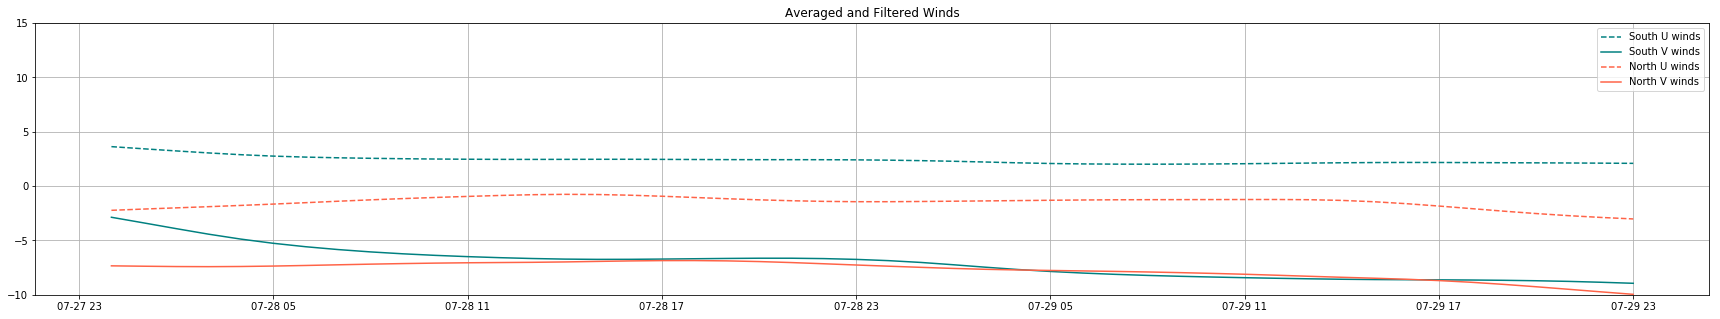

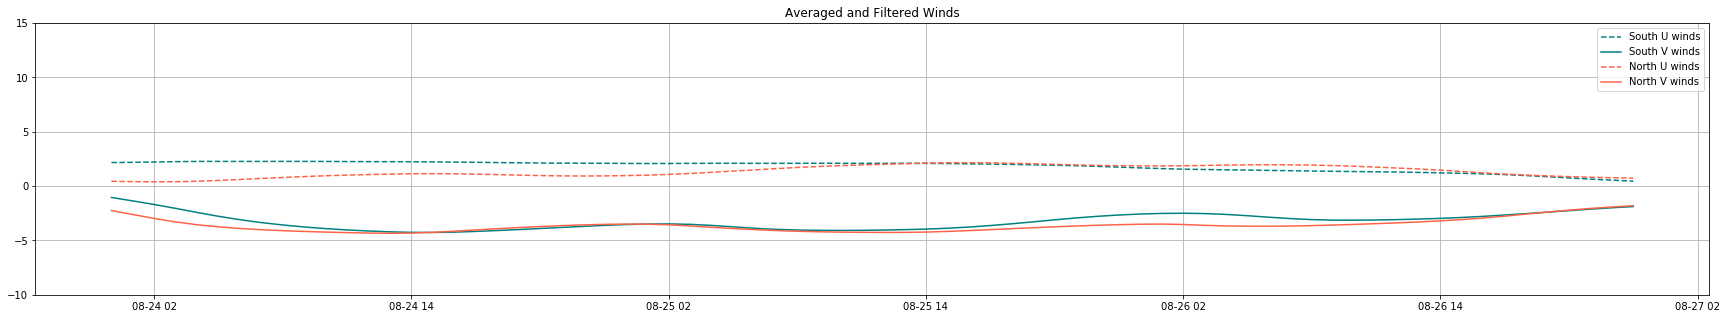

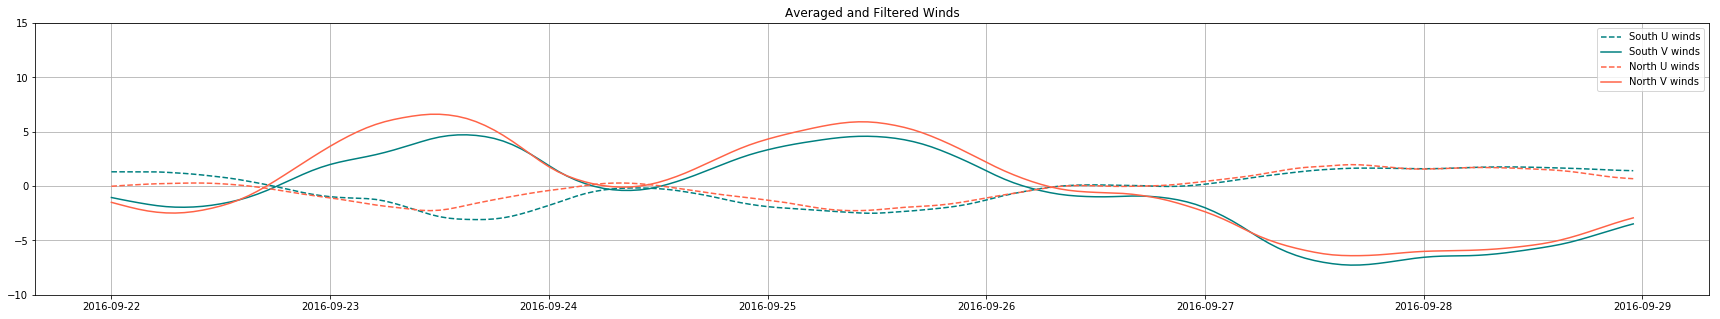

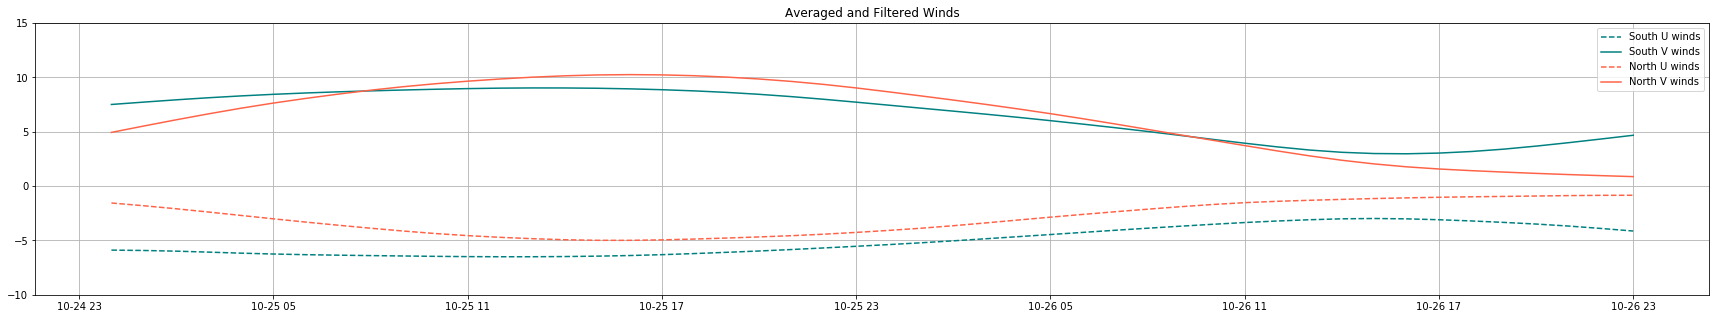

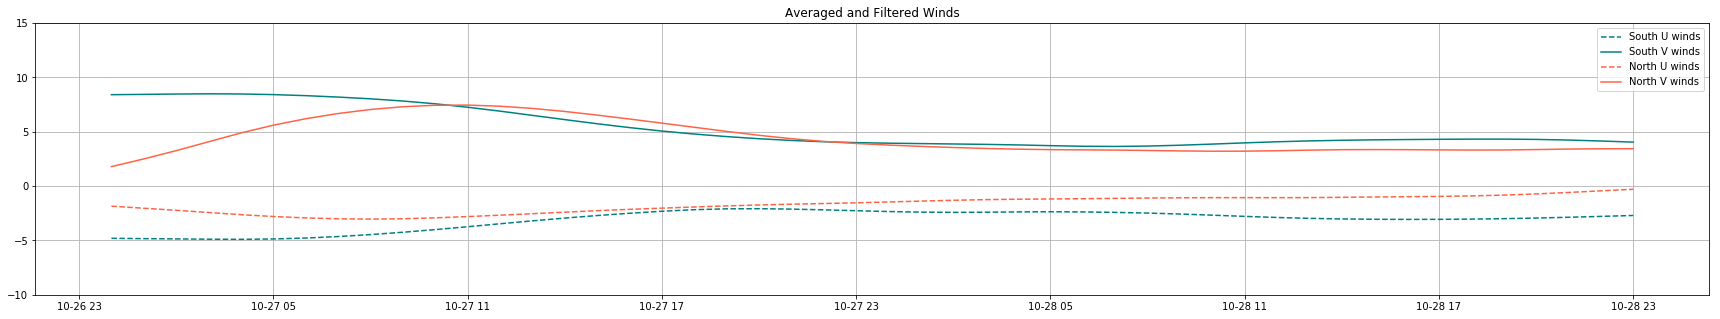

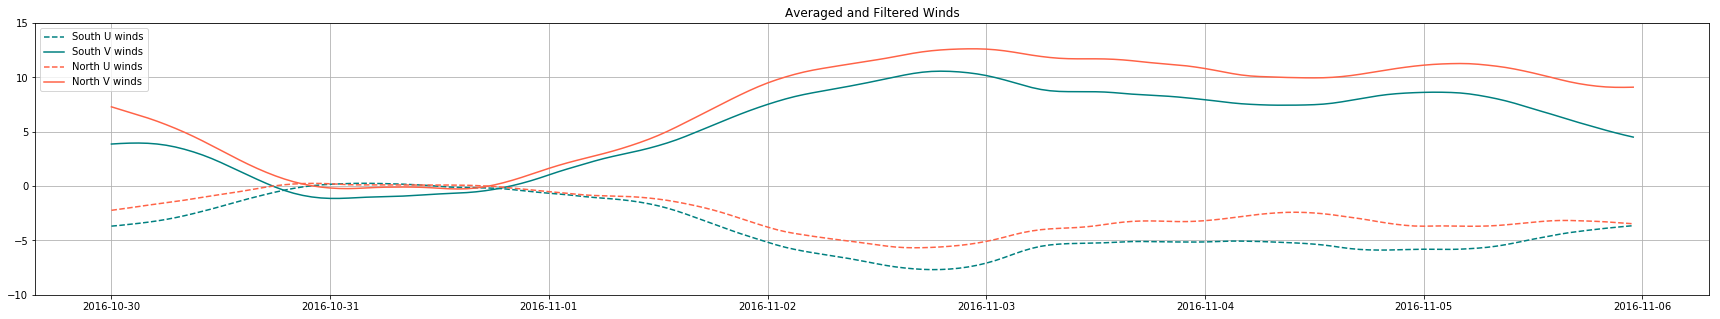

In [58]:
for n in range(11, 21):
    plot_winds(datetime.datetime(int(years[n]),int(start_months[n]),int(start_days[n])), 
               datetime.datetime(int(years[n]),int(end_months[n]),int(end_days[n])))

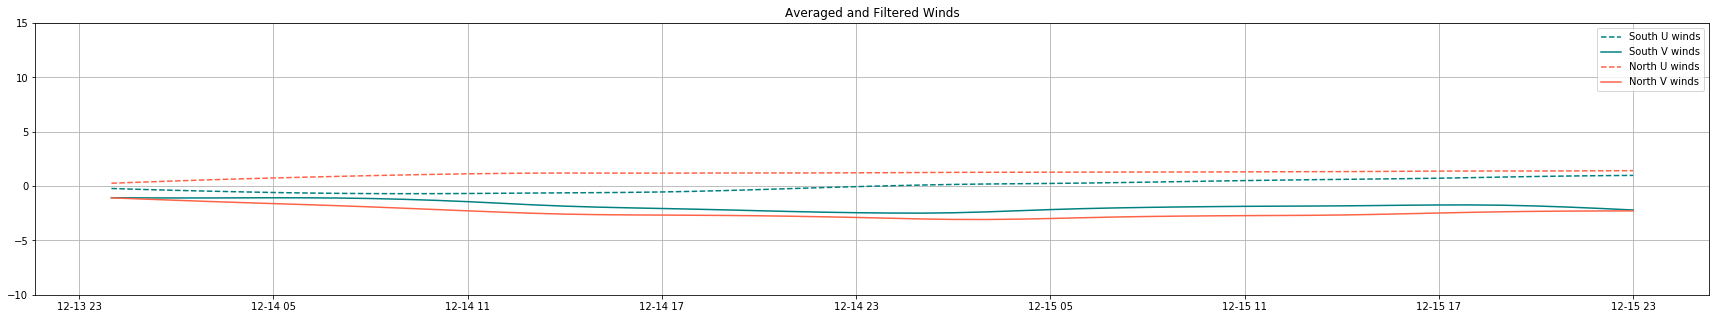

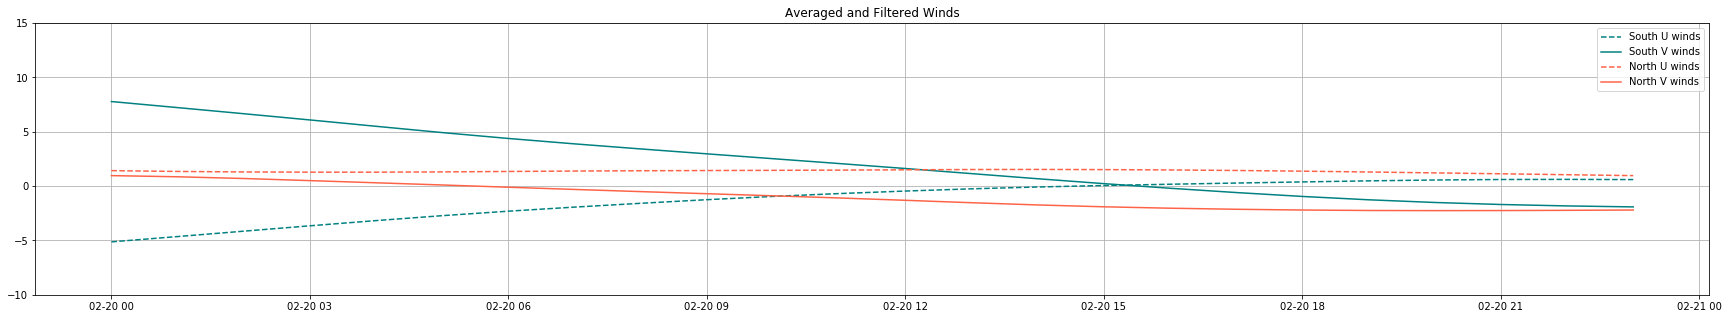

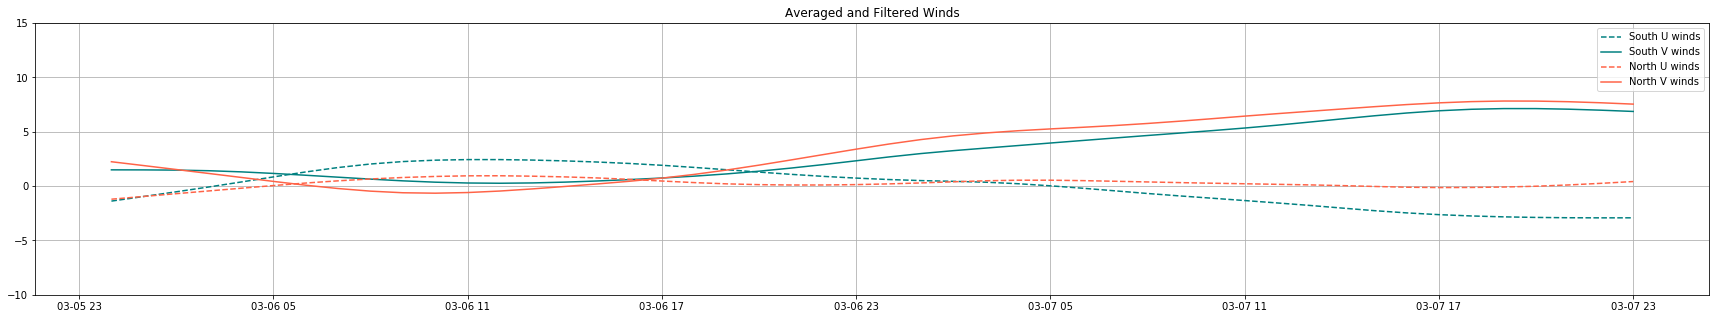

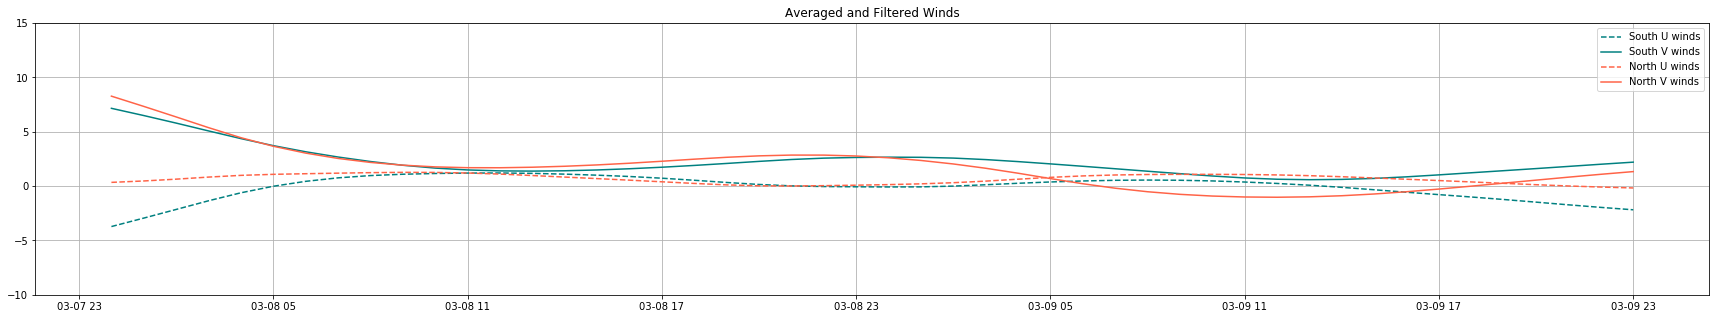

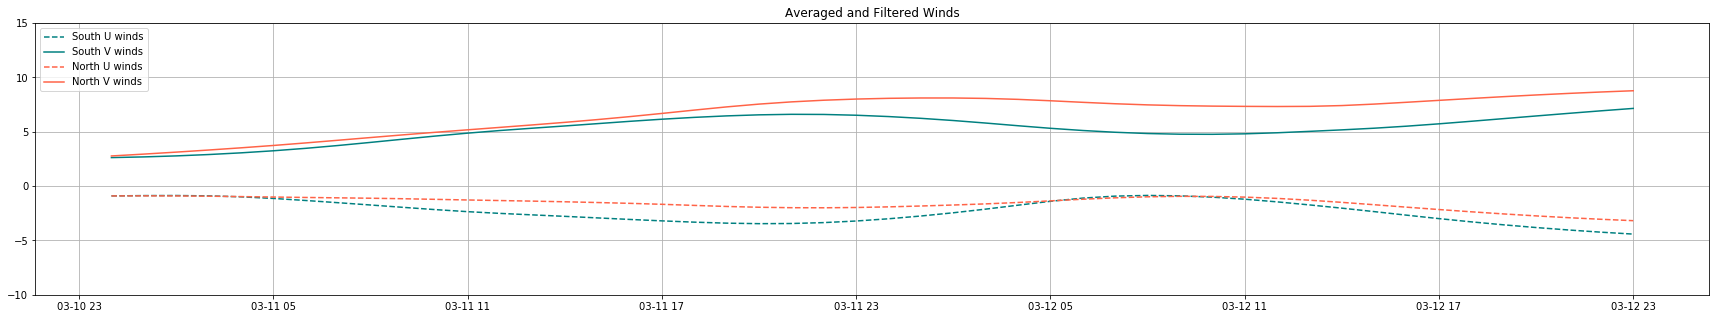

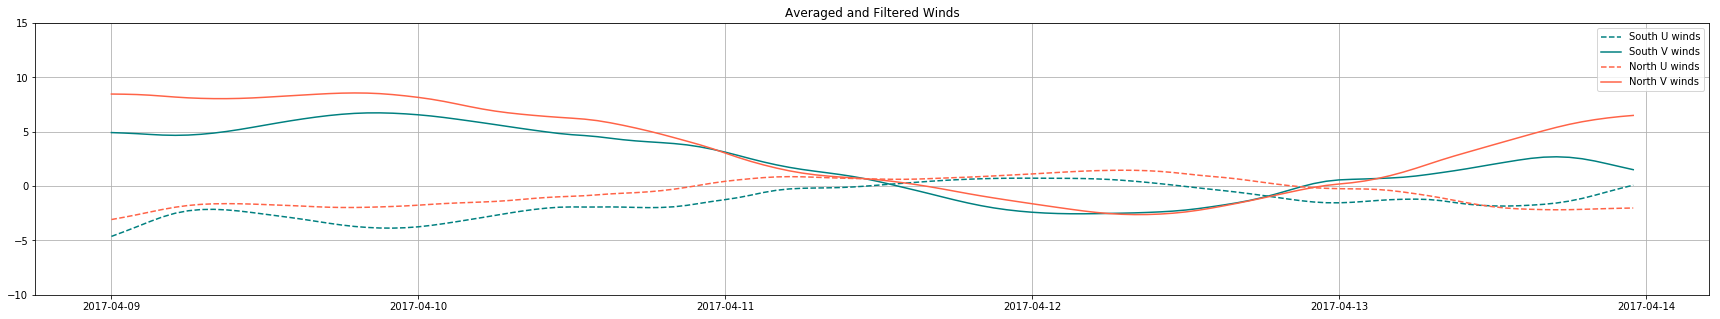

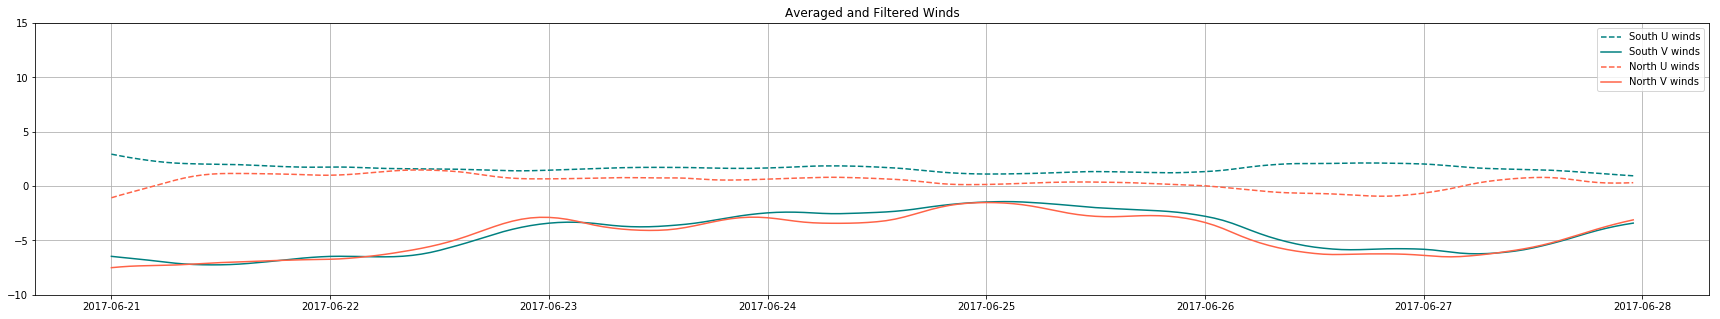

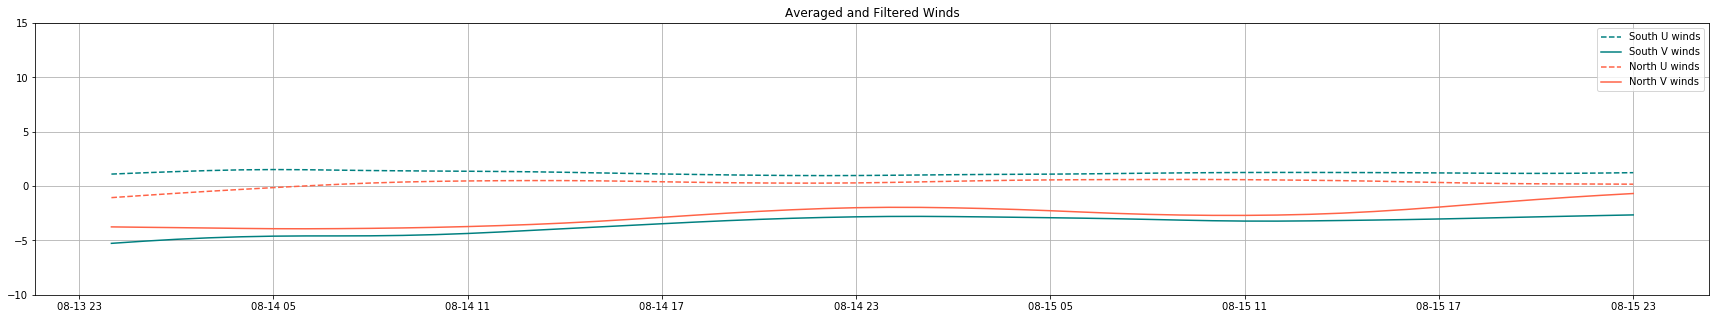

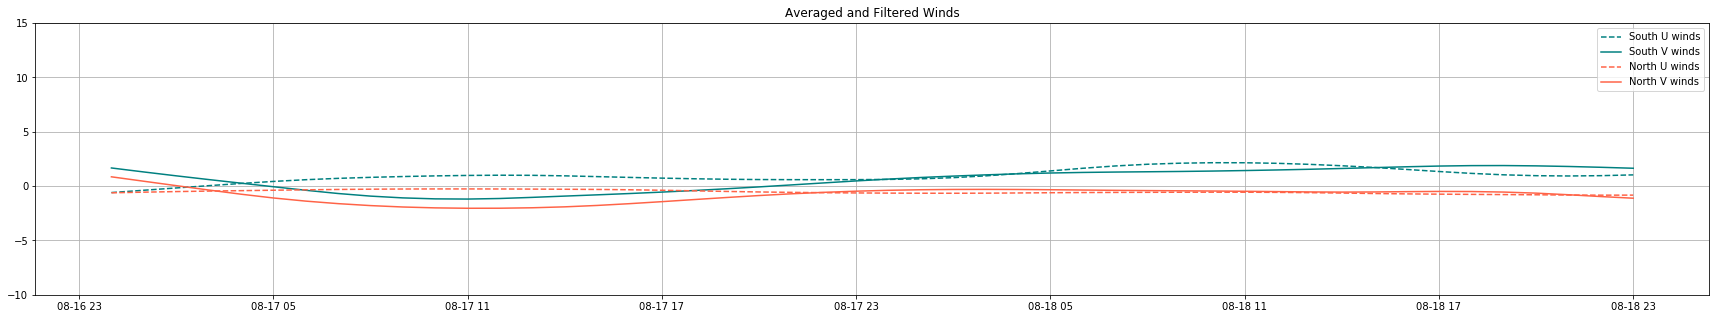

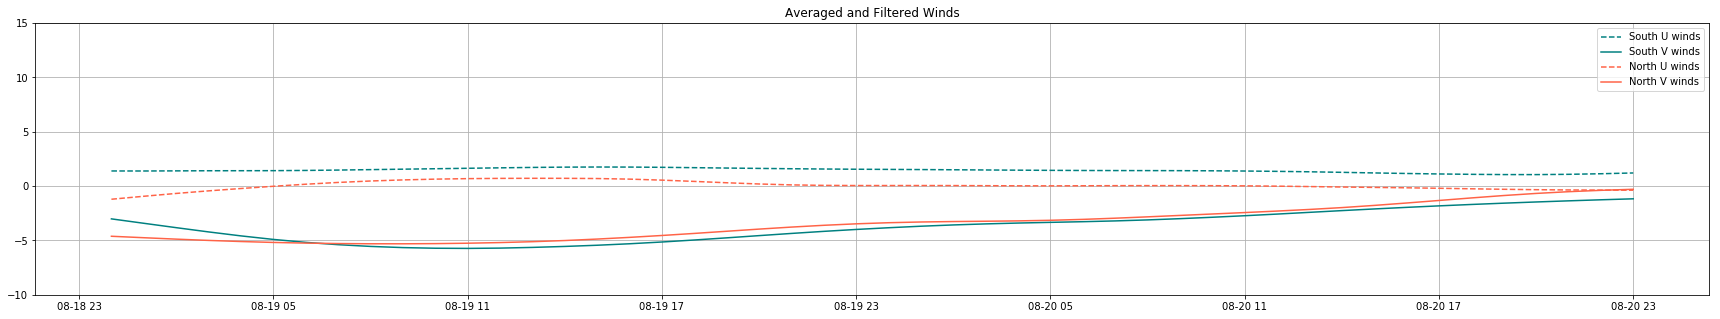

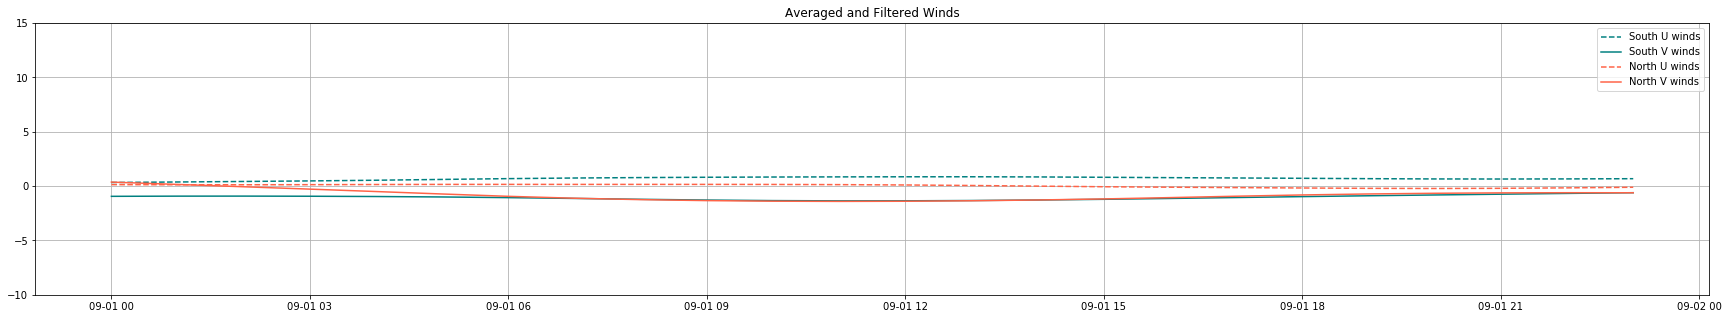

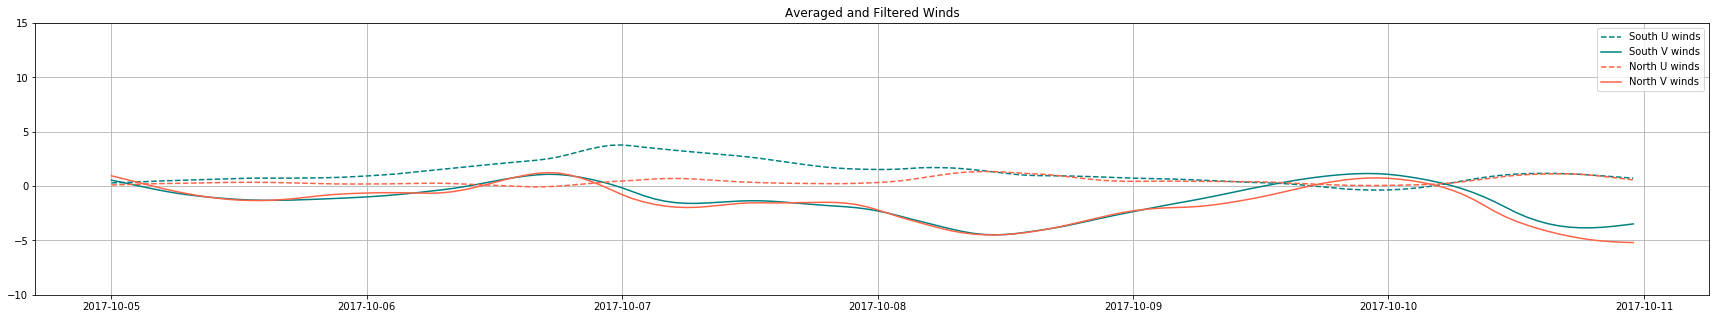

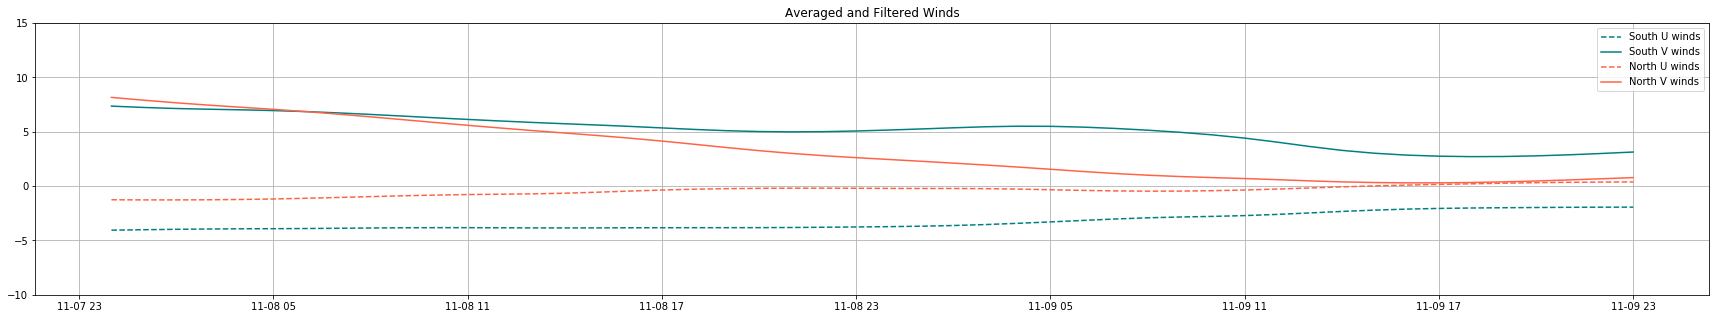

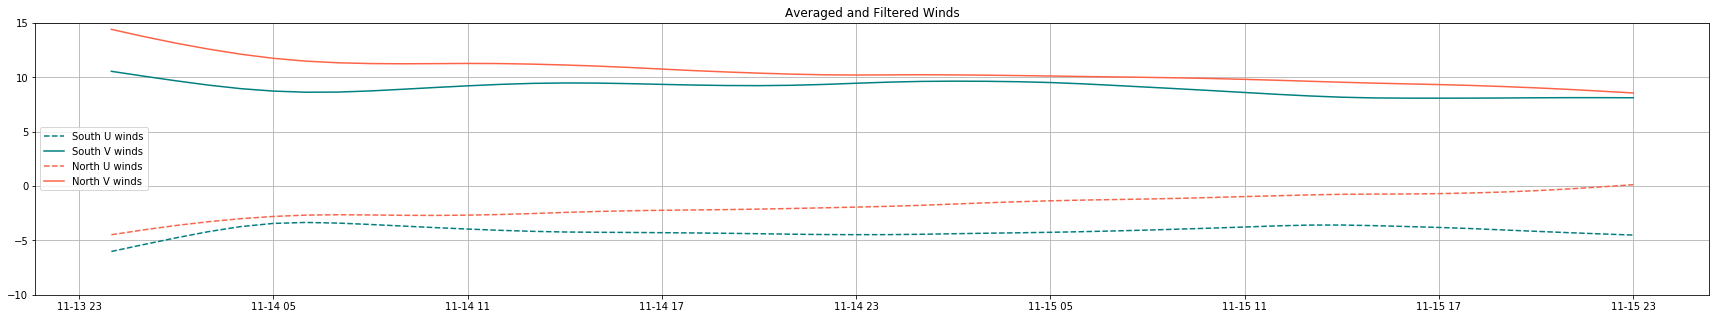

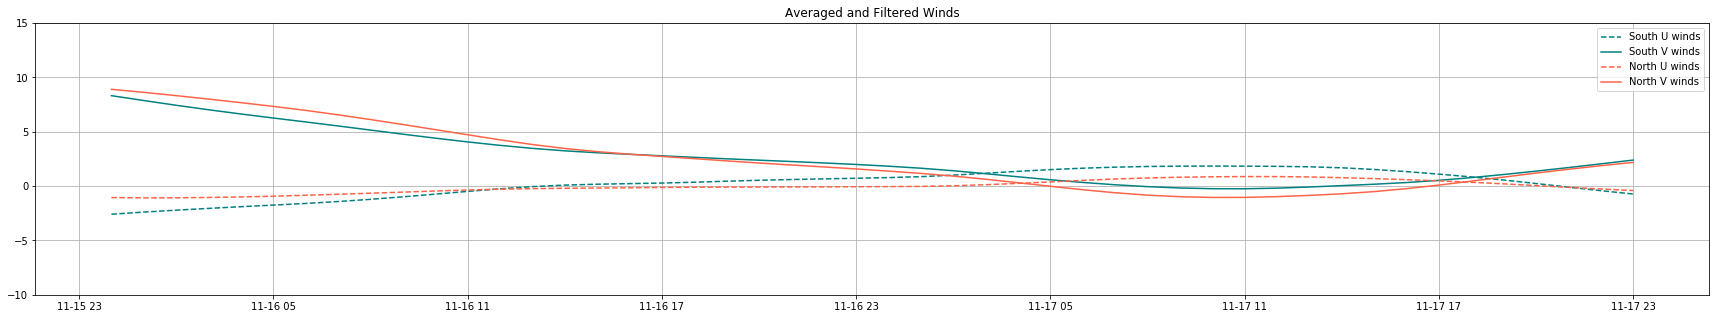

In [59]:
for n in range(21, 36):
    plot_winds(datetime.datetime(int(years[n]),int(start_months[n]),int(start_days[n])), 
               datetime.datetime(int(years[n]),int(end_months[n]),int(end_days[n])))